In [1]:
import matplotlib.pyplot as pyplot
import numpy
import math

Na początek zapoznanie z danymi:

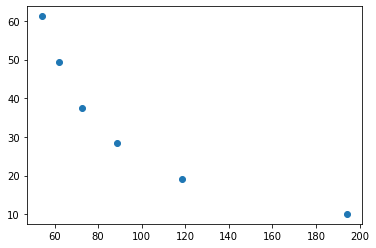

In [2]:
v = [54.3, 61.8, 72.4, 88.7, 118.6, 194.0]
p = [61.2, 49.5, 37.6, 28.4, 19.2, 10.1]

pyplot.scatter(v,p)
pyplot.show()

Chcemy odnaleźć prawdopodobne wartości $C$ i $k$ stosując regresję liniową, zatem musimy sprowadzić równanie $PV^k = C$ do jakiejś zależności liniowej zmiennych $V$ i $P$, weźmiemy zatem logarytm z obu stron

$$
    PV^k = C\ /log \\
    log(PV^k) = logC \\
    logP + logV^k = logC \\
    logP + k \cdot logV = logC \\
    logP = logC - k \cdot logV
$$

Teraz możemy zastosować regresję liniową, czyli znaleźć prostą regresji w postaci
$$
y = \beta_0 + \beta_1 \cdot x,
$$

Gdzie y'kami będą zlogarytmowane wartości $P$, a x'ami zlogarytmowane wartości $V$. Wynikiem będzie $b_0 \approx logC$ i $b_1 \approx -k$

Wektor współczynników $\beta$ możemy policzyć korzystając ze wzoru z wykładu:
$$
\beta = (X^t X)^{-1}X^tY,
$$
gdzie $Y$ to wektor y'ków, a $X$ to macierz w postaci 

$$
X = \left[
    \begin{array}{cc}
        1 & x_1 \\
        1 & x_2 \\
        \vdots & \vdots \\
        1 & x_n
    \end{array}
\right]
$$

Zbadamy wygląd przekształconych danych

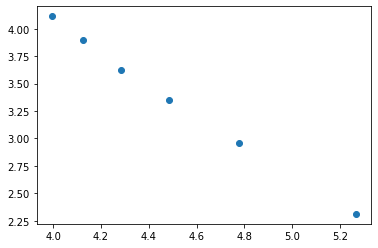

In [3]:
def g(x):
    return math.log(x)

def map_list(f, x): 
    return list(map(f,x))

x = map_list(g, v)
y = map_list(g, p)

pyplot.scatter(x, y)
pyplot.show();

A następnie stosujemy wzór na prostą regresji

In [4]:
X = []
for xi in x:
    X.append([1,xi])
Y = y

X = numpy.array(X)
Y = numpy.array(Y)

In [5]:
beta = X.T.dot(X)
beta = numpy.linalg.inv(beta)
beta = beta.dot(X.T)
beta = beta.dot(Y)

print(beta)

[ 9.67858039 -1.404204  ]


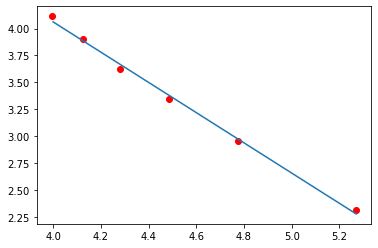

In [6]:
b_0 = beta[0]
b_1 = beta[1]

def f(x):
    return b_0 + b_1 * x

linspace = numpy.linspace(4,5.27);

pyplot.scatter(x,y,color="Red")
pyplot.plot(linspace, map_list(f, linspace))
pyplot.show()

Teraz odtwarzamy wartości $C$ i $k$

In [7]:
C = math.e ** beta[0]
k = -beta[1]

print(C)
print(k)

15971.807087826615
1.4042040049307856


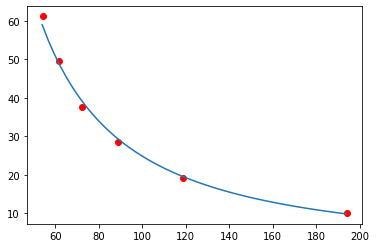

In [9]:
def h(v):
    return C / (v**k) 

linspace2 = numpy.linspace(54,194);

pyplot.scatter(v,p, color="Red")
pyplot.plot(linspace2, map_list(h, linspace2))
pyplot.show()

In [10]:
h(100)

24.828246365961625